In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [23]:
file_path = "dataset_marks_23053273.xlsx"
data = pd.read_excel(file_path, sheet_name="dataset_marks_23053273.csv")

In [11]:
data['Interview Dt.'] = pd.to_datetime(data['Interview Dt.'], errors='coerce')


In [12]:
print("Shape of dataset:", data.shape)
print("\nColumns:", data.columns)
print("\nData types:\n", data.dtypes)
print("\nMissing values:\n", data.isnull().sum())
print("\nSummary statistics:\n", data.describe())

Shape of dataset: (200, 8)

Columns: Index(['Roll No', 'Python', 'Sql', 'ML', 'Tableau', 'Excel', 'Placed',
       'Interview Dt.'],
      dtype='object')

Data types:
 Roll No                   int64
Python                  float64
Sql                     float64
ML                      float64
Tableau                 float64
Excel                   float64
Placed                   object
Interview Dt.    datetime64[ns]
dtype: object

Missing values:
 Roll No          0
Python           0
Sql              0
ML               0
Tableau          0
Excel            0
Placed           0
Interview Dt.    0
dtype: int64

Summary statistics:
           Roll No      Python         Sql          ML     Tableau       Excel  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean   100.500000    0.514100    0.495850    0.514350    0.495150    0.474950   
min      1.000000    0.000000    0.010000    0.000000    0.010000    0.000000   
25%     50.750000    0.237500   

<Figure size 1000x600 with 0 Axes>

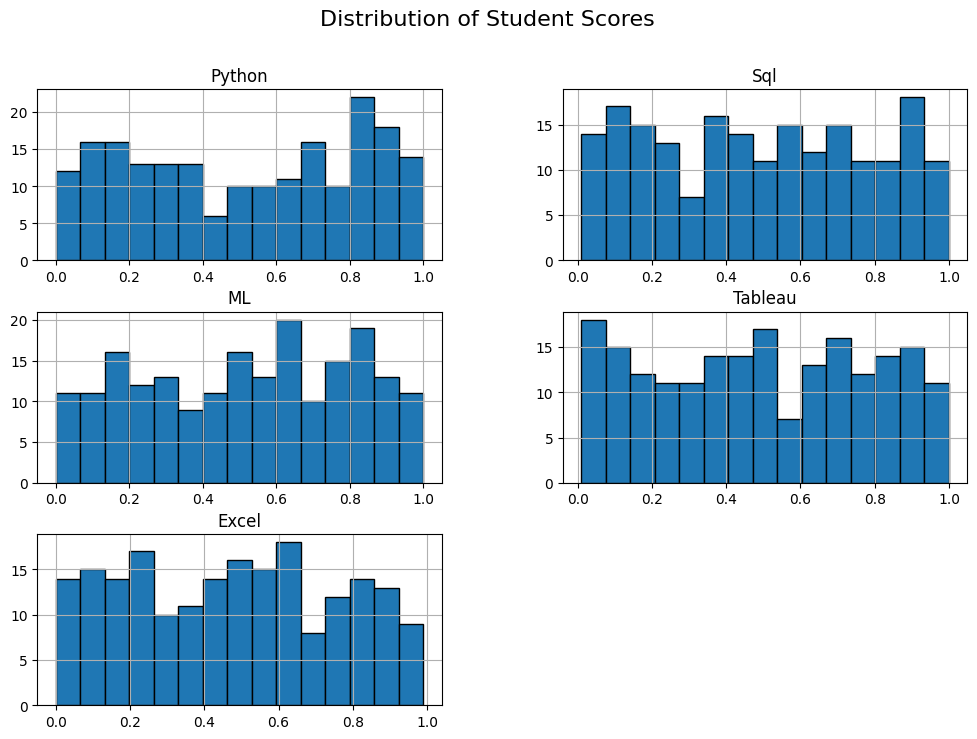

In [13]:
plt.figure(figsize=(10,6))
data[['Python','Sql','ML','Tableau','Excel']].hist(bins=15, figsize=(12,8), edgecolor="black")
plt.suptitle("Distribution of Student Scores", fontsize=16)
plt.show()

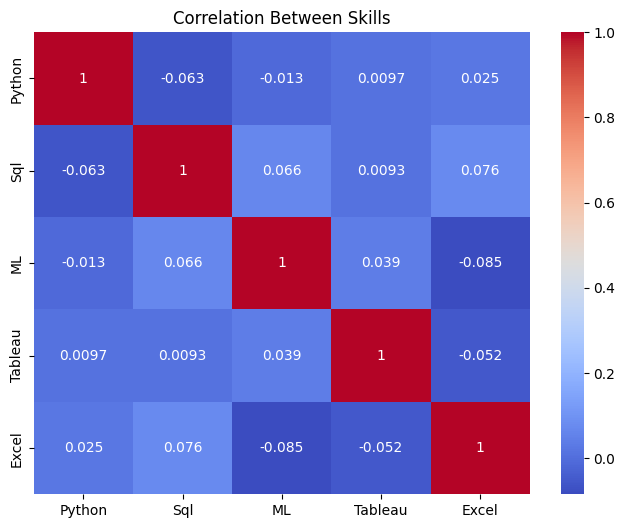

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(data[['Python','Sql','ML','Tableau','Excel']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Skills")
plt.show()

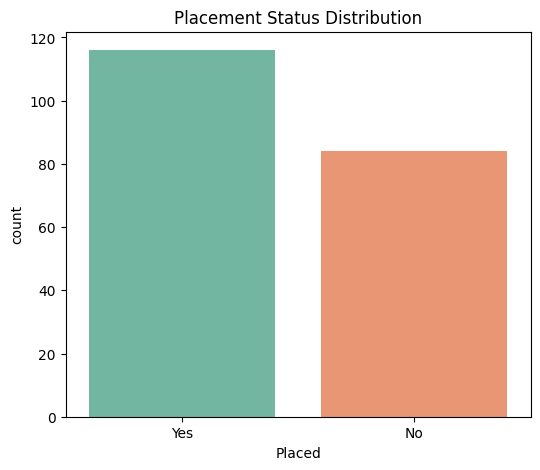

In [16]:
plt.figure(figsize=(6,5))
sns.countplot(x='Placed', data=data, hue='Placed', palette="Set2", legend=False)
plt.title("Placement Status Distribution")
plt.show()

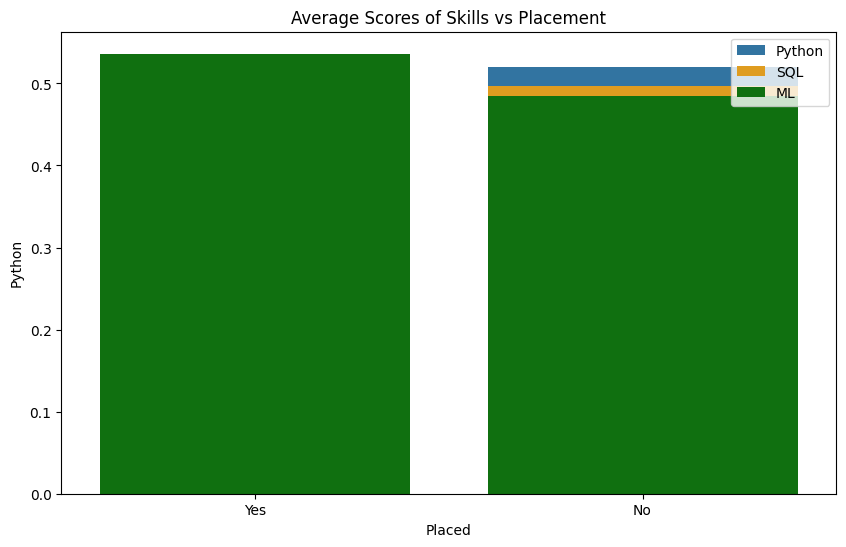

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Placed', y='Python', estimator='mean', errorbar=None, label="Python")
sns.barplot(data=data, x='Placed', y='Sql', estimator='mean', errorbar=None, color="orange", label="SQL")
sns.barplot(data=data, x='Placed', y='ML', estimator='mean', errorbar=None, color="green", label="ML")
plt.title("Average Scores of Skills vs Placement")
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

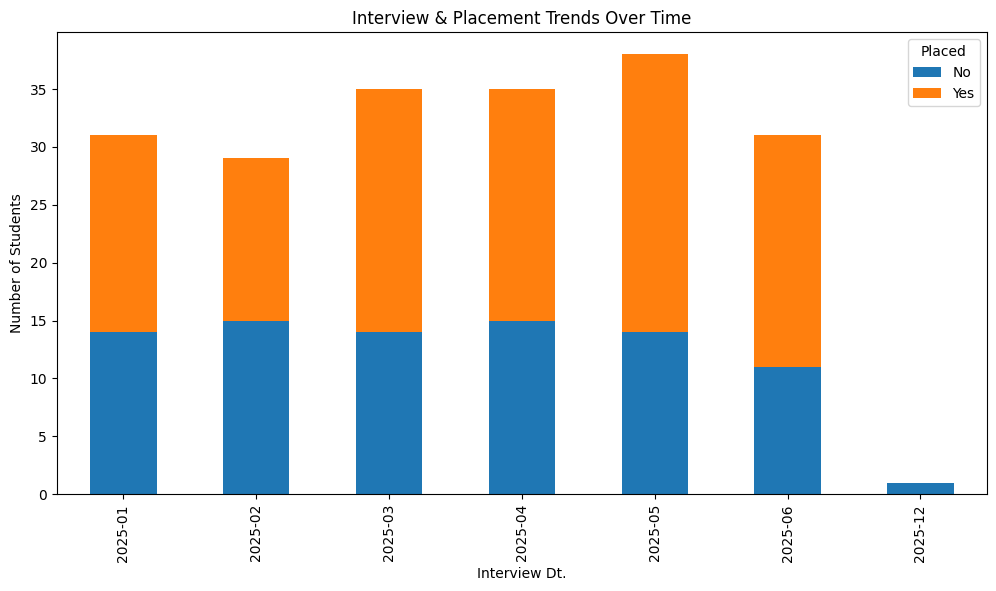

In [19]:
plt.figure(figsize=(10,6))
interview_counts = data.groupby(data['Interview Dt.'].dt.to_period("M")).Placed.value_counts().unstack().fillna(0)
interview_counts.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Interview & Placement Trends Over Time")
plt.ylabel("Number of Students")
plt.show()


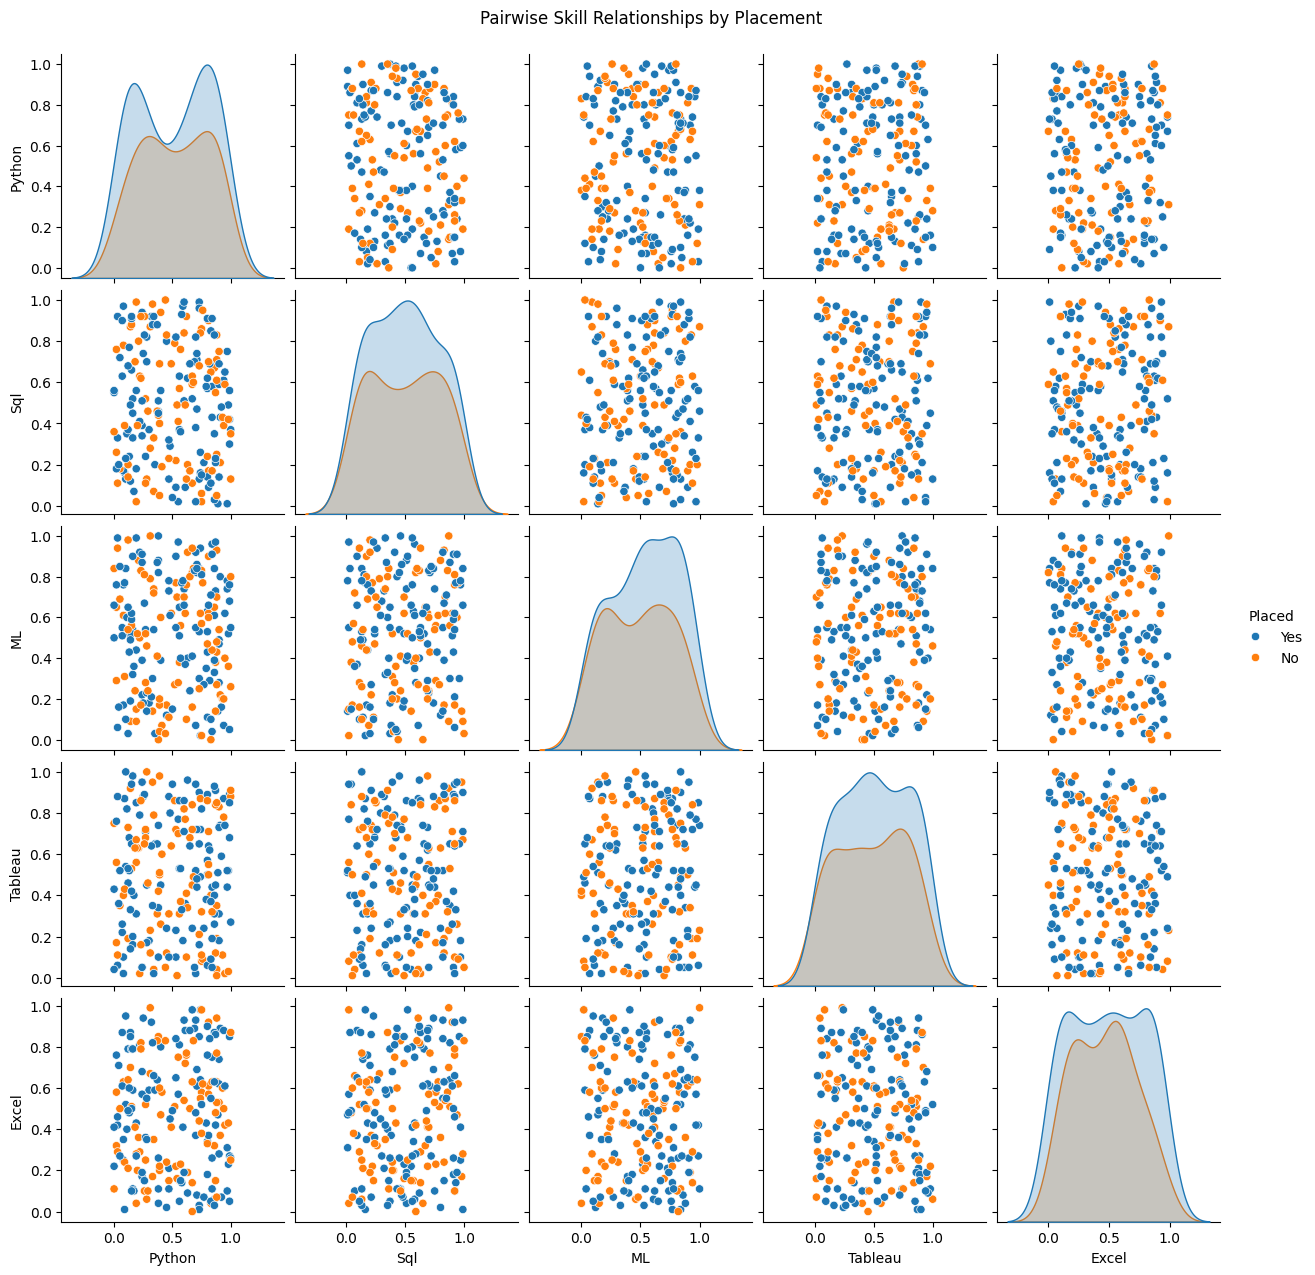

In [20]:
sns.pairplot(data[['Python','Sql','ML','Tableau','Excel','Placed']], hue='Placed')
plt.suptitle("Pairwise Skill Relationships by Placement", y=1.02)
plt.show()

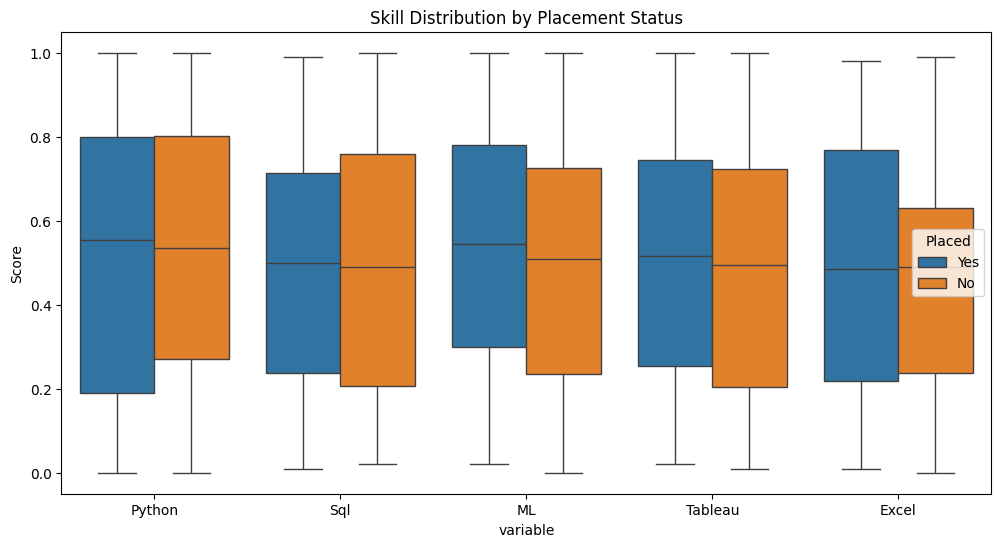

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data.melt(id_vars='Placed', value_vars=['Python','Sql','ML','Tableau','Excel']),
            x='variable', y='value', hue='Placed')
plt.title("Skill Distribution by Placement Status")
plt.ylabel("Score")
plt.show()

In [22]:
print("""
1. Most students scored between 0.4 - 0.8 in different subjects.
2. Python, SQL, and ML are strongly correlated – good technical base improves placement chances.
3. Students who are placed generally have higher skill scores.
4. Placement numbers vary over time, with peak months for interviews.
5. Visualization confirms that technical subjects play a big role in placement outcomes.
""")


1. Most students scored between 0.4 - 0.8 in different subjects.
2. Python, SQL, and ML are strongly correlated – good technical base improves placement chances.
3. Students who are placed generally have higher skill scores.
4. Placement numbers vary over time, with peak months for interviews.
5. Visualization confirms that technical subjects play a big role in placement outcomes.

